In [1]:
import pandas as pd
import numpy as np
from chunk_utils import *
import matplotlib
import matplotlib.pyplot as plt
from itertools import product
from functools import reduce
import seaborn as sns
from util_new import chars_alp, chr2code

data_dir = './data/dw_freetext/'
alp_kcodes = list(map(lambda x: chr2code(x), chars_alp))
all_keypairs = [''.join(x) for x in product(chars_alp, chars_alp)]

In [2]:
df = pd.read_csv(data_dir+'GunControl_400.csv', delimiter='\t', usecols=[0,6,10])
df_filtered = df[df['Task']=='Copy_2']
# "Copy_2" column = when they're stating true opinion, repeating (transcribing) the essay already written
df_filtered.head(7)

,UserName,Task,ReviewMeta
1,A10E8QHPV30BAD,Copy_2,0 MouseUp 0 0;874 KeyDown 16;946 KeyDown 73;10...
5,A11T1LGIWPM9Z1,Copy_2,0 MouseUp 0 0;784 KeyDown 16;863 KeyDown 84;92...
9,A145PJ769UGAID,Copy_2,0 MouseUp 0 0;1517 KeyDown 16;1517 KeyDown 87;...
13,A161NZP385W1TX,Copy_2,0 MouseUp 0 0;1621 KeyDown 16;1734 KeyDown 84;...
17,A168RQT8B18FH,Copy_2,0 MouseUp 0 0;2112 KeyDown 16;2311 KeyDown 73;...
21,A16HFBY06FP1RJ,Copy_2,0 MouseUp 0 0;317 KeyDown 16;543 KeyDown 71;62...
25,A191P01GHJRPWO,Copy_2,0 MouseUp 0 0;7007 KeyDown 16;7018 KeyDown 73;...


In [7]:
key_delay_dict = {ch:[] for ch in all_keypairs}

for indx in range(df_filtered.shape[0]):
    onerawkd = df_filtered['ReviewMeta'].iloc[20]
    keys = parsekevents(parsekdata(onerawkd))
    keypairs_filt = filter(lambda x: x[0].kcode in alp_kcodes and x[1].kcode in alp_kcodes, zip(keys, keys[1:]))
    key_delays = list(map(lambda x: ((x[0].character+x[1].character), x[1].press_time - x[0].press_time), keypairs_filt))
    for pair, delay in key_delays:
        key_delay_dict[pair].append(delay)

In [8]:
maxdelay = reduce(max, reduce(max, key_delay_dict.values()))
key_delay_frac = {kpair:reduce(lambda x, y: (x+y)/2, delays) for kpair, delays in key_delay_dict.items() if len(delays)}

In [9]:
# prepare for becoming square matrix
for kpair in all_keypairs:
    if not kpair in key_delay_frac:
        key_delay_frac[kpair] = 0
        
delay_matrix = {}
for k1 in chars_alp:
    delay_matrix[k1] = {}
    for k2 in chars_alp:
        delay_matrix[k1][k2] = key_delay_frac[k1+k2]
        
delay_df = pd.DataFrame(delay_matrix)

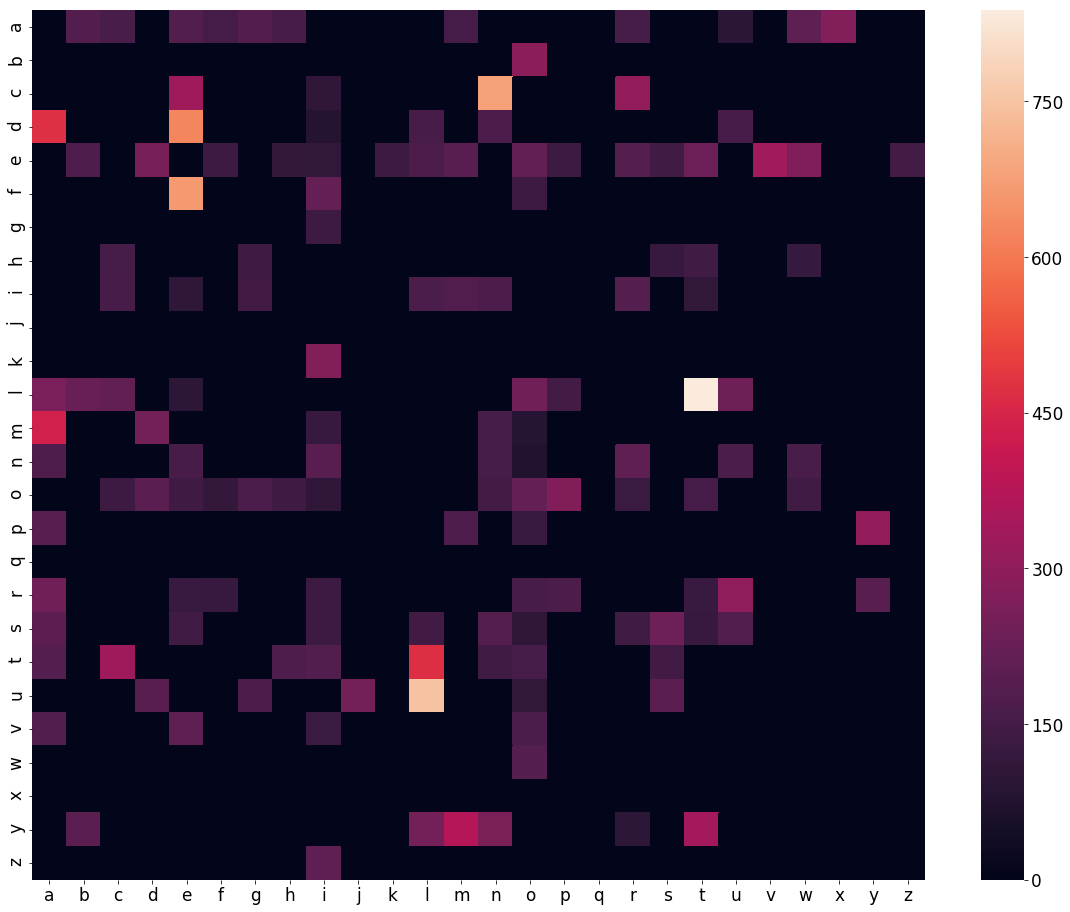

In [10]:
matplotlib.rcParams['figure.figsize'] = 20,16
font = {'size': 17}
matplotlib.rc('font', **font)

sns.heatmap(delay_df)